In [3]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(H):
    return np.exp(H)/np.sum(np.exp(H),axis=1,keepdims=1)

In [39]:
class ClassifierNeuralNetwork3():
    def __init__(self,InputColumns,OutputColumns,Layer1Nodes,Layer2Nodes):
        self.weights0=np.random.randn(InputColumns,Layer1Nodes)
        self.bias0=np.random.randn(1,Layer1Nodes)
        self.weights1=np.random.randn(Layer1Nodes,Layer2Nodes)
        self.bias1=np.random.randn(1,Layer2Nodes)
        self.weights2=np.random.randn(Layer2Nodes,OutputColumns)
        self.bias2=np.random.randn(1,OutputColumns)
    
    def forward(self,Input):
        self.H0 = Input@self.weights0 + self.bias0
        self.Z0 = np.tanh(self.H0)
        self.H1 = self.Z0@self.weights1 + self.bias1
        self.Z1 = np.tanh(self.H1)
        self.H2 = self.Z1@self.weights2 + self.bias2
        self.Output = softmax(self.H2)
        self.Costs=[]
        #return self.Output
        
    def predict(self,Input):
        self.forward(Input)
        return self.Output
    
    def backward(self,Input,Output):
        self.gradweights2=self.Z1.T@(self.Output-Output)
        self.gradbias2 = np.sum(self.Output-Output,axis=0,keepdims=1)
        self.gradweights1 = self.Z0.T@(((self.Output-Output)@self.weights2.T)*(1-self.Z1**2))
        self.gradbias1= np.sum(((self.Output-Output)@self.weights2.T)*(1-self.Z1**2),axis=0,keepdims=1)
        self.gradweights0 = Input.T@(((((self.Output-Output)@
                                        self.weights2.T)*
                                       (1-self.Z1**2))@
                                      self.weights1.T)*
                                     (1-self.Z0**2))
        self.gradbias0 = np.sum(((((self.Output-Output)@
                                        self.weights2.T)*
                                       (1-self.Z1**2))@
                                      self.weights1.T)*
                                     (1-self.Z0**2),axis=0,keepdims=1)
        
    def fit(self,eta,epochs,X,Y):
        self.Costs=[]
        for i in range(epochs):
            self.forward(X)
            self.backward(X,Y)
            self.Costs.append(-(Y*np.log(self.Output)).sum())
            print('Iteration: {}, Cost:{}'.format(i+1,self.Costs[-1]))
            self.weights2-=eta*self.gradweights2
            self.bias2-=eta*self.gradbias2
            self.weights1-=eta*self.gradweights1
            self.bias1-=eta*self.gradbias1
            self.weights0-=eta*self.gradweights0
            self.bias0-=eta*self.gradbias0

In [63]:
N = 500
b = 1
Data = np.vstack((np.hstack((np.random.randn(N,2)+[[b,b]],[[1,0,0]]*N)),
                  np.hstack((np.random.randn(N,2)+[[-b,0]],[[0,1,0]]*N)),
                  np.hstack((np.random.randn(N,2)+[[b,-b]],[[0,0,1]]*N))))

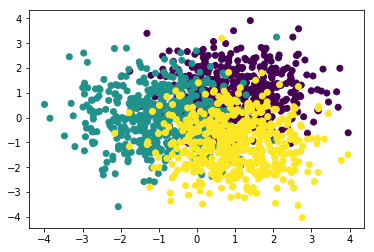

In [64]:
plt.scatter(Data[:,0],Data[:,1],c=np.argmax(Data[:,2:],axis=1))

In [65]:
np.random.shuffle(Data)
model = ClassifierNeuralNetwork3(InputColumns=2,OutputColumns=3,Layer1Nodes=2,Layer2Nodes=2)

In [66]:
model.predict(Data[:,:2])

array([[0.2317327 , 0.65265839, 0.11560891],
       [0.5974358 , 0.0356191 , 0.36694511],
       [0.58862639, 0.03474245, 0.37663116],
       ...,
       [0.59102911, 0.03486465, 0.37410623],
       [0.54491991, 0.03937361, 0.41570648],
       [0.60002607, 0.03607331, 0.36390062]])

In [67]:
model.backward(Data[:,:2],Data[:,2:])

In [68]:
model.fit(eta=1e-3,epochs=2000,X=Data[:,:2],Y=Data[:,2:])

Iteration: 1, Cost:2236.6271475362087
Iteration: 2, Cost:1517.1447593575929
Iteration: 3, Cost:1335.4454692864888
Iteration: 4, Cost:1272.785989684488
Iteration: 5, Cost:1233.9948630606348
Iteration: 6, Cost:1203.1124810744159
Iteration: 7, Cost:1175.1349059835181
Iteration: 8, Cost:1148.1995242300982
Iteration: 9, Cost:1121.784526623945
Iteration: 10, Cost:1096.256718282893
Iteration: 11, Cost:1072.2980462170995
Iteration: 12, Cost:1050.3803967255935
Iteration: 13, Cost:1031.221347574398
Iteration: 14, Cost:1015.4333109437441
Iteration: 15, Cost:1003.3597578344127
Iteration: 16, Cost:994.6962342380848
Iteration: 17, Cost:988.5174960350694
Iteration: 18, Cost:983.8730679778951
Iteration: 19, Cost:980.1435937748528
Iteration: 20, Cost:976.9960231861176
Iteration: 21, Cost:974.2520172475006
Iteration: 22, Cost:971.7987475358264
Iteration: 23, Cost:969.5526148548836
Iteration: 24, Cost:967.4491338009803
Iteration: 25, Cost:965.4391215383336
Iteration: 26, Cost:963.4857755626902
Iteration:

Iteration: 239, Cost:932.4085454079873
Iteration: 240, Cost:934.8290390395256
Iteration: 241, Cost:932.1721466413344
Iteration: 242, Cost:934.5933837237648
Iteration: 243, Cost:931.9272125821867
Iteration: 244, Cost:934.3519949055285
Iteration: 245, Cost:931.6844784990343
Iteration: 246, Cost:934.1162276311826
Iteration: 247, Cost:931.4522794421882
Iteration: 248, Cost:933.893003540257
Iteration: 249, Cost:931.2333013510438
Iteration: 250, Cost:933.6825235197944
Iteration: 251, Cost:931.0244734676049
Iteration: 252, Cost:933.4794488465624
Iteration: 253, Cost:930.8194987131678
Iteration: 254, Cost:933.2764057489062
Iteration: 255, Cost:930.6124335442872
Iteration: 256, Cost:933.0678320954576
Iteration: 257, Cost:930.40051519593
Iteration: 258, Cost:932.8523485264657
Iteration: 259, Cost:930.1850523698904
Iteration: 260, Cost:932.63279030232
Iteration: 261, Cost:929.9702664756394
Iteration: 262, Cost:932.4142550297834
Iteration: 263, Cost:929.7609425528416
Iteration: 264, Cost:932.20139

Iteration: 485, Cost:922.9420299392791
Iteration: 486, Cost:923.3119889169525
Iteration: 487, Cost:922.9248877249322
Iteration: 488, Cost:923.2838855012653
Iteration: 489, Cost:922.9078893063336
Iteration: 490, Cost:923.2560244355368
Iteration: 491, Cost:922.8910373307095
Iteration: 492, Cost:923.2284135648028
Iteration: 493, Cost:922.8743478323152
Iteration: 494, Cost:923.2010695484379
Iteration: 495, Cost:922.8578402229534
Iteration: 496, Cost:923.174006715681
Iteration: 497, Cost:922.8415262907359
Iteration: 498, Cost:923.1472280902303
Iteration: 499, Cost:922.8254041090076
Iteration: 500, Cost:923.1207231587866
Iteration: 501, Cost:922.8094596905254
Iteration: 502, Cost:923.0944730215608
Iteration: 503, Cost:922.7936748995937
Iteration: 504, Cost:923.068459607329
Iteration: 505, Cost:922.7780369434292
Iteration: 506, Cost:923.0426737540982
Iteration: 507, Cost:922.7625442999833
Iteration: 508, Cost:923.0171179744211
Iteration: 509, Cost:922.7472062298248
Iteration: 510, Cost:922.99

Iteration: 717, Cost:921.8851512062663
Iteration: 718, Cost:921.3757016089933
Iteration: 719, Cost:921.8822013806423
Iteration: 720, Cost:921.3677107794088
Iteration: 721, Cost:921.879323217091
Iteration: 722, Cost:921.3598301134498
Iteration: 723, Cost:921.8765158088062
Iteration: 724, Cost:921.3520587040467
Iteration: 725, Cost:921.8737784095307
Iteration: 726, Cost:921.3443958003993
Iteration: 727, Cost:921.8711104278311
Iteration: 728, Cost:921.336840761111
Iteration: 729, Cost:921.8685113454858
Iteration: 730, Cost:921.3293929563611
Iteration: 731, Cost:921.8659806067997
Iteration: 732, Cost:921.3220516723413
Iteration: 733, Cost:921.8635175369837
Iteration: 734, Cost:921.3148160661767
Iteration: 735, Cost:921.8611213288273
Iteration: 736, Cost:921.3076851904841
Iteration: 737, Cost:921.8587910994918
Iteration: 738, Cost:921.3006580701045
Iteration: 739, Cost:921.856525983641
Iteration: 740, Cost:921.2937337884066
Iteration: 741, Cost:921.8543252131814
Iteration: 742, Cost:921.286

Iteration: 949, Cost:921.8630439554859
Iteration: 950, Cost:920.9920031095533
Iteration: 951, Cost:921.8645117873687
Iteration: 952, Cost:920.9919830074336
Iteration: 953, Cost:921.865994243281
Iteration: 954, Cost:920.9919832269973
Iteration: 955, Cost:921.8674894846807
Iteration: 956, Cost:920.9919892506772
Iteration: 957, Cost:921.8689949052314
Iteration: 958, Cost:920.9919841011382
Iteration: 959, Cost:921.8705071148343
Iteration: 960, Cost:920.9919494868343
Iteration: 961, Cost:921.8720220172603
Iteration: 962, Cost:920.9918675920235
Iteration: 963, Cost:921.873535008684
Iteration: 964, Cost:920.9917235482101
Iteration: 965, Cost:921.8750413215937
Iteration: 966, Cost:920.9915085542675
Iteration: 967, Cost:921.8765365322931
Iteration: 968, Cost:920.9912235184804
Iteration: 969, Cost:921.8780172393414
Iteration: 970, Cost:920.9908829785087
Iteration: 971, Cost:921.8794819034049
Iteration: 972, Cost:920.9905189189349
Iteration: 973, Cost:921.8809318146193
Iteration: 974, Cost:920.99

Iteration: 1197, Cost:900.584235481361
Iteration: 1198, Cost:897.7403510511438
Iteration: 1199, Cost:897.7323929663025
Iteration: 1200, Cost:896.3994929686314
Iteration: 1201, Cost:897.9800348956632
Iteration: 1202, Cost:898.0429114229288
Iteration: 1203, Cost:902.4615218312341
Iteration: 1204, Cost:904.5086004396147
Iteration: 1205, Cost:914.6116628727873
Iteration: 1206, Cost:918.8409046638046
Iteration: 1207, Cost:936.8806016371927
Iteration: 1208, Cost:938.8488120037875
Iteration: 1209, Cost:955.8704486874467
Iteration: 1210, Cost:949.2080992620278
Iteration: 1211, Cost:950.0666994318924
Iteration: 1212, Cost:943.1375892677905
Iteration: 1213, Cost:933.6703372529098
Iteration: 1214, Cost:931.7664848317053
Iteration: 1215, Cost:921.2441551572385
Iteration: 1216, Cost:921.1855173497335
Iteration: 1217, Cost:913.117204274561
Iteration: 1218, Cost:913.6287995979799
Iteration: 1219, Cost:908.5207985071056
Iteration: 1220, Cost:909.7715827514476
Iteration: 1221, Cost:906.9096018977928
It

Iteration: 1428, Cost:917.4480943292925
Iteration: 1429, Cost:918.5742707053992
Iteration: 1430, Cost:927.339219908881
Iteration: 1431, Cost:924.6815684400128
Iteration: 1432, Cost:929.9227982065865
Iteration: 1433, Cost:922.8577049964471
Iteration: 1434, Cost:923.6934319483585
Iteration: 1435, Cost:916.6016655158194
Iteration: 1436, Cost:916.2201939981057
Iteration: 1437, Cost:911.9029089542182
Iteration: 1438, Cost:912.6051959438239
Iteration: 1439, Cost:911.8024769772599
Iteration: 1440, Cost:914.7092007789996
Iteration: 1441, Cost:918.8234004771742
Iteration: 1442, Cost:924.0706036853946
Iteration: 1443, Cost:935.6964719305206
Iteration: 1444, Cost:937.7935922503996
Iteration: 1445, Cost:953.9616221862395
Iteration: 1446, Cost:939.8814367696436
Iteration: 1447, Cost:948.3873415813478
Iteration: 1448, Cost:926.2769739761654
Iteration: 1449, Cost:927.7446951646708
Iteration: 1450, Cost:913.2059332700802
Iteration: 1451, Cost:913.7907718998323
Iteration: 1452, Cost:905.8636313403367
I

Iteration: 1662, Cost:911.5867989331864
Iteration: 1663, Cost:915.3661640993396
Iteration: 1664, Cost:919.8647079196363
Iteration: 1665, Cost:931.922281353463
Iteration: 1666, Cost:934.7798426425912
Iteration: 1667, Cost:953.0596972316184
Iteration: 1668, Cost:940.5966217142108
Iteration: 1669, Cost:951.2566988624968
Iteration: 1670, Cost:928.4576446057852
Iteration: 1671, Cost:930.2996633934844
Iteration: 1672, Cost:914.597482810728
Iteration: 1673, Cost:915.0624105883146
Iteration: 1674, Cost:906.5310668777877
Iteration: 1675, Cost:907.9167710898262
Iteration: 1676, Cost:903.2967146924832
Iteration: 1677, Cost:906.3176856881735
Iteration: 1678, Cost:904.3618428847915
Iteration: 1679, Cost:910.5180736310576
Iteration: 1680, Cost:912.4171617322218
Iteration: 1681, Cost:925.3982815017009
Iteration: 1682, Cost:934.9755167749454
Iteration: 1683, Cost:955.2502376802474
Iteration: 1684, Cost:959.1891899969162
Iteration: 1685, Cost:958.0950249702317
Iteration: 1686, Cost:933.6729974879238
It

Iteration: 1916, Cost:921.3744863330407
Iteration: 1917, Cost:912.7322747548997
Iteration: 1918, Cost:903.8196524887193
Iteration: 1919, Cost:900.1459523120573
Iteration: 1920, Cost:897.2027455412299
Iteration: 1921, Cost:897.3217676873035
Iteration: 1922, Cost:899.0371125685956
Iteration: 1923, Cost:907.1583557107883
Iteration: 1924, Cost:922.3883421991486
Iteration: 1925, Cost:957.9960132781987
Iteration: 1926, Cost:992.3055481080186
Iteration: 1927, Cost:1006.7103131100102
Iteration: 1928, Cost:966.865430986943
Iteration: 1929, Cost:937.5412734493732
Iteration: 1930, Cost:917.705879692291
Iteration: 1931, Cost:907.7133072632089
Iteration: 1932, Cost:903.5063075208703
Iteration: 1933, Cost:899.1296285109753
Iteration: 1934, Cost:897.8782524926646
Iteration: 1935, Cost:895.7058093509402
Iteration: 1936, Cost:895.7365832497935
Iteration: 1937, Cost:894.8924089689399
Iteration: 1938, Cost:896.459451546191
Iteration: 1939, Cost:897.1586397148662
Iteration: 1940, Cost:901.8851029808006
It

In [69]:
simX = (np.random.rand(10000,2)-0.5)*(Data[:,:2].max(axis=0,keepdims=True)-Data[:,:2].min(axis=0,keepdims=True))

In [70]:
simOutput = model.predict(simX)

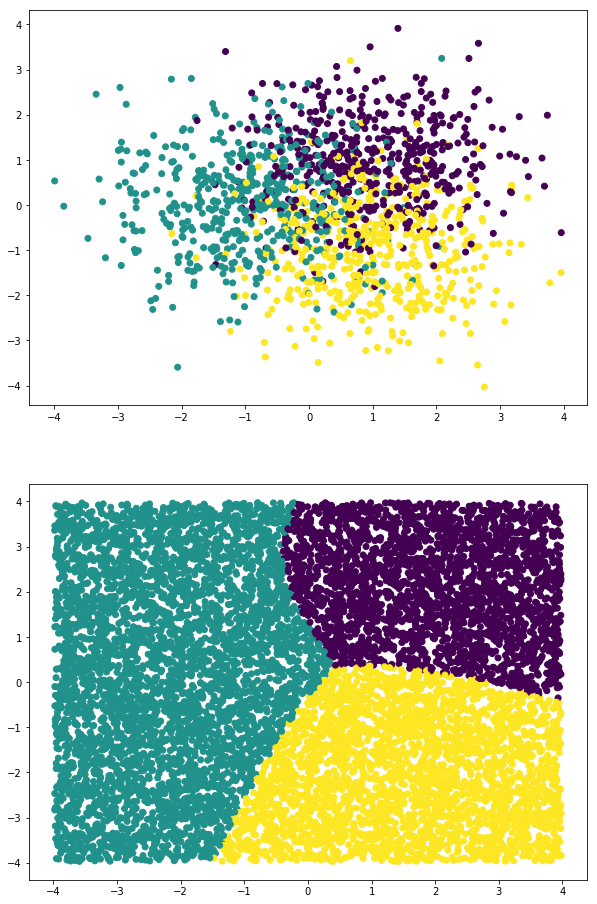

In [71]:
plt.figure(figsize=(10,16))
plt.subplot(2,1,1)
plt.scatter(Data[:,0],Data[:,1],c=np.argmax(Data[:,2:],axis=1))
plt.subplot(2,1,2)
plt.scatter(simX[:,0],simX[:,1],c=np.argmax(simOutput,axis=1))